## Medical image Reconstruction

In this problem, you will consider an example resembles medical imaging reconstruction in MRI. We
begin with a true image image of dimension 50 × 50 (i.e., there are 2500 pixels in total). Data is
cs.mat; you can plot it first. This image is truly sparse, in the sense that 2084 of its pixels have a value
of 0, while 416 pixels have a value of 1. You can think of this image as a toy version of an MRI image
that we are interested in collecting.
Because of the nature of the machine that collects the MRI image, it takes a long time to measure each
pixel value individually, but it’s faster to measure a linear combination of pixel values. We measure
n = 1300 linear combinations, with the weights in the linear combination being random, in fact,
independently distributed as N (0, 1). Because the machine is not perfect, we don’t get to observe this
directly, but we observe a noisy version. These measurements are given by the entries of the vector
y = Ax + n,
where y ∈ R^1300, A ∈ R^1300×2500, and n ∼ N (0, 25 × I1300) where In denotes the identity matrix of
size n × n. In this homework, you can generate the data y using this model.
Now the question is: can we model y as a linear combination of the columns of A to recover some
coefficient vector that is close to the image? Roughly speaking, the answer is yes.
Key points here: although the number of measurements n = 1300 is smaller than the dimension p
= 2500, the true image is sparse. Thus we can recover the sparse image using few measurements
exploiting its structure. This is the idea behind the field of compressed sensing.
The image recovery can be done using lasso


### Use lasso to recover the image and select λ using 10-fold cross-validation. Plot the cross-validation error curves, and show the recovered image

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import scipy.io as spio
import time
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error

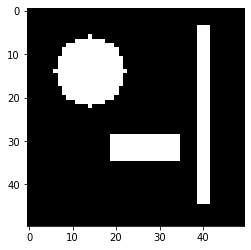

In [4]:
mri = spio.loadmat('data/cs.mat',squeeze_me=True)['img']
x = mri.reshape((50*50))
plt.imshow(mri, cmap='gray')


In [45]:
print(x)

[0 0 0 ... 0 0 0]


In [11]:
A = np.random.normal(0, 1, (1300,2500))
eps = np.random.normal(0, np.sqrt(25), (1300,1))
y = (A@x).reshape((1300,1)) + eps

In [12]:
model = Lasso(tol = 1e-8, max_iter = 100000)

cv = KFold(n_splits=10, random_state=5, shuffle=True)

grid = dict()
grid['alpha'] = np.arange(0.04, 0.71, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)


In [14]:
# best lambda
results = search.fit(A, y)
alpha = results.best_params_['alpha']
print(alpha)


0.060000000000000005


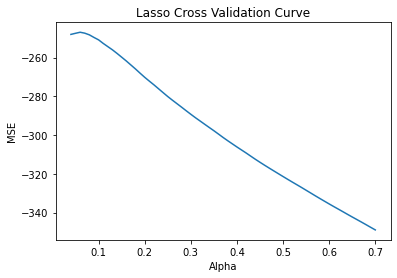

In [15]:
# CV Curve
mse = results.cv_results_['mean_test_score']
plt.plot(grid['alpha'],mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Lasso Cross Validation Curve')
plt.savefig('Lasso_CV_Curve.jpg')

Text(0.5, 1.0, 'Lasso Recovered Image')

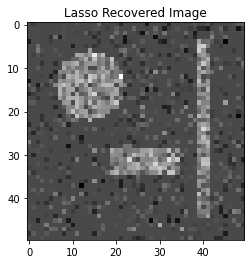

In [16]:
# Lasso Image
lm = Lasso(alpha = alpha)

lm.fit(A,y)

coefs = lm.coef_
lasso_img = (coefs).reshape(50,50)
plt.imshow(lasso_img, cmap='gray')
plt.title('Lasso Recovered Image')

In [46]:
lm.score(A,y)

0.9895943855627721

### Also use ridge regression to recover the image. Select λ using 10-fold cross-validation. Plot the cross-validation error curves, and show the recovered image. Which approaches give a better recovered image?


In [40]:
model_r = Ridge()

cv_r = KFold(n_splits=10, random_state=5, shuffle=True)

grid_r = dict()
grid_r['alpha'] = np.arange(49, 151, 1)

search_r = GridSearchCV(model_r, grid_r, scoring='neg_mean_squared_error', cv=cv_r, n_jobs=-1)

In [41]:
#search
results_r = search_r.fit(A, y)
alpha_r = results_r.best_params_['alpha']
print(alpha_r)


110


Text(0.5, 1.0, 'Ridge Cross Validation Curve')

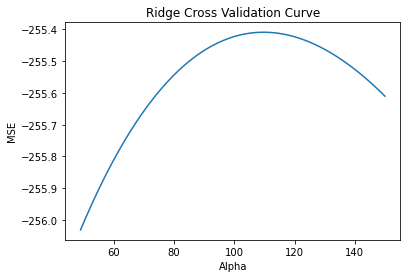

In [42]:
# CV Curve
mse = results_r.cv_results_['mean_test_score']
plt.plot(grid_r['alpha'],mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge Cross Validation Curve')

Text(0.5, 1.0, 'Ridge Recovered Image')

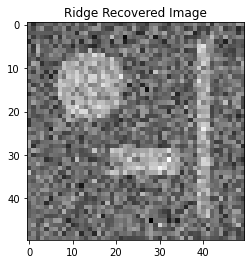

In [43]:
#Ridge Image
rm = Ridge(alpha = alpha_r)

rm.fit(A,y)

coefs = rm.coef_
ridge_img = (coefs).reshape(50,50)
plt.imshow(ridge_img, cmap='gray')
plt.title('Ridge Recovered Image')

In [47]:
rm.score(A,y)

0.996790765756157